In [1]:
from protrend.utils import NeoDatabase, Settings

neo_db = NeoDatabase(user_name=Settings.db_user_name, password=Settings.db_password,
                     ip=Settings.db_ip, port=Settings.db_port)
neo_db.connect()

In [2]:
import pandas as pd
from collections import defaultdict

entities = ('Regulator', 'Gene', 'TFBS', 'RegulatoryInteraction')

x = 'Out-Degree (Kout)'
y = 'Out-Degree Probability P(Kout)'

dfs = []
# organism out-degree distribution
for label in entities:

    res = neo_db.db.cypher_query(f"match(o:Organism)-[]-(r:{label}) return o.protrend_id, count(distinct(r.protrend_id))")

    tmp = pd.DataFrame(res[0], columns=['Organism', label])

    total = int(tmp.shape[0])
    degree_counts = defaultdict(int)
    for value in tmp[label]:
        degree_counts[value] += 1

    degree_coefs = [{x: degree, y: cnt / total} for degree, cnt in degree_counts.items()]
    df = pd.DataFrame(degree_coefs)
    df['label'] = label
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)
df

,Out-Degree (Kout),Out-Degree Probability P(Kout),label
0,1,0.111940,Regulator
1,27,0.014925,Regulator
2,66,0.016791,Regulator
3,35,0.018657,Regulator
4,49,0.009328,Regulator
...,...,...,...
1001,305,0.001866,RegulatoryInteraction
1002,199,0.001866,RegulatoryInteraction
1003,414,0.001866,RegulatoryInteraction
1004,306,0.001866,RegulatoryInteraction


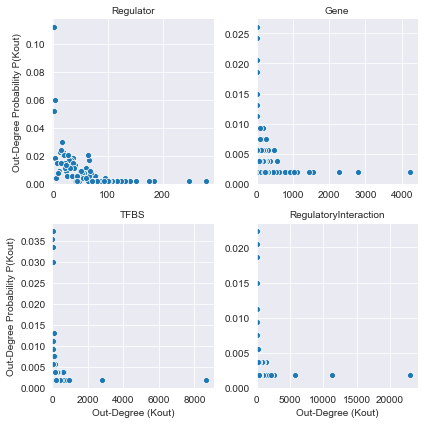

In [3]:
from matplotlib import pyplot as plt
# library & dataset
import seaborn as sns

g = sns.FacetGrid(df, col="label", col_wrap=2, sharex=False, sharey=False)
g.map(sns.scatterplot, x, y)

g.set(xlim=-1, ylim=0)
g.set_titles("{col_name}")

# save the figure
plt.savefig("organism_degree.png", bbox_inches="tight", dpi=150)
plt.show()

In [37]:
import pandas as pd
from collections import defaultdict

entities = ('Gene', 'TFBS', 'RegulatoryInteraction')

x = 'Out-Degree (Kout)'
y = 'Out-Degree Probability P(Kout)'

dfs = []
# organism out-degree distribution
for label in entities:

    res = neo_db.db.cypher_query(f"match(o:Regulator)-[]-(r:{label}) return o.protrend_id, count(distinct(r.protrend_id))")

    tmp = pd.DataFrame(res[0], columns=['Regulator', label])

    total = int(tmp.shape[0])
    degree_counts = defaultdict(int)
    for value in tmp[label]:
        degree_counts[value] += 1

    degree_coefs = [{x: degree, y: cnt / total} for degree, cnt in degree_counts.items()]
    df = pd.DataFrame(degree_coefs)
    df['label'] = label
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)
df

,Out-Degree (Kout),Out-Degree Probability P(Kout),label
0,2,0.152397,Gene
1,1,0.145951,Gene
2,3,0.133433,Gene
3,11,0.022656,Gene
4,9,0.033421,Gene
...,...,...,...
564,162,0.000063,RegulatoryInteraction
565,381,0.000063,RegulatoryInteraction
566,142,0.000063,RegulatoryInteraction
567,249,0.000063,RegulatoryInteraction


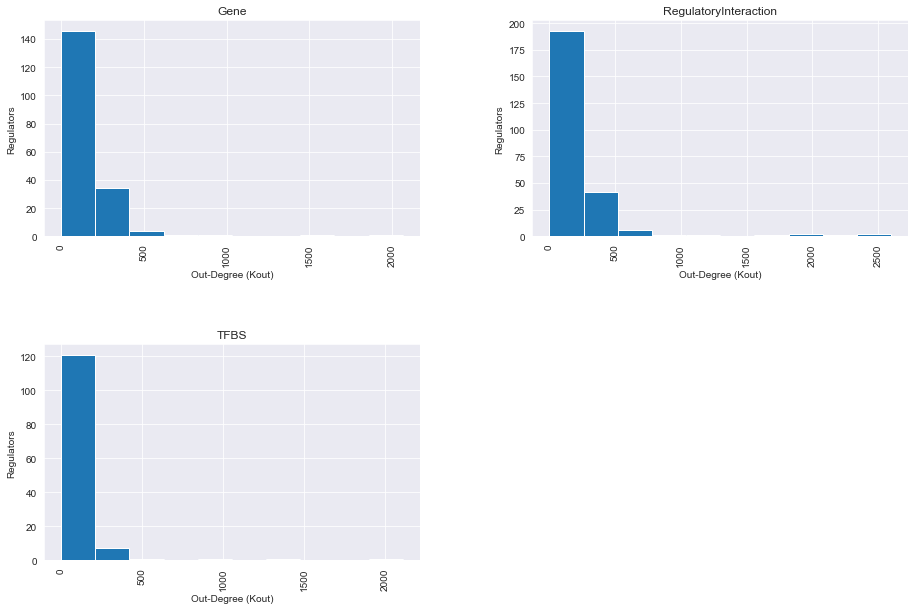

In [65]:
counts = df[['Out-Degree (Kout)', 'label']].hist(by='label', bins=10, figsize=(15, 10))

for ax in counts.flatten():
    ax.set_xlabel("Out-Degree (Kout)")
    ax.set_ylabel("Regulators")

plt.savefig("regulator_degree.png", bbox_inches="tight", dpi=150)
plt.show()

In [86]:
import pandas as pd

entities = ('Regulator', 'Gene', 'TFBS', 'RegulatoryInteraction')

x = 'Out-Degree (Kout)'
y = 'Out-Degree Probability P(Kout)'

dfs = []
# organism out-degree distribution
for label in entities:

    res = neo_db.db.cypher_query(f"match(o:Organism)-[]-(r:{label}) return o.protrend_id, o.name, count(distinct(r.protrend_id))")

    df = pd.DataFrame(res[0], columns=['Organism ID', 'Organism Name', 'Out-Degree (Kout)'])
    df['label'] = label
    dfs.append(df)

In [88]:
data = pd.concat(dfs, ignore_index=True)
data = data.set_index('Organism ID')
data

,Organism Name,Out-Degree (Kout),label
Organism ID,,,
PRT.ORG.0000002,Acidobacterium capsulatum ATCC 51196,1,Regulator
PRT.ORG.0000003,Acinetobacter baumannii ATCC 17978,1,Regulator
PRT.ORG.0000004,Actinobacillus pleuropneumoniae serovar 5b str...,1,Regulator
PRT.ORG.0000005,Actinobacillus pleuropneumoniae serovar 7 str....,27,Regulator
PRT.ORG.0000006,Agrobacterium fabrum str. C58,66,Regulator
...,...,...,...
PRT.ORG.0000609,Idiomarina baltica OS145,223,RegulatoryInteraction
PRT.ORG.0000610,Glaciecola sp. HTCC2999,199,RegulatoryInteraction
PRT.ORG.0000611,Colwellia psychrerythraea 34H,414,RegulatoryInteraction


In [89]:
# get top 25 regulators
top_regulators = data[data['label'] == 'Regulator'].sort_values(by='Out-Degree (Kout)', ascending=False).head(25)
top_regulators

,Organism Name,Out-Degree (Kout),label
Organism ID,,,
PRT.ORG.0000012,Bacillus subtilis subsp. subtilis str. 168,279,Regulator
PRT.ORG.0000035,Escherichia coli str. K-12 substr. MG1655,248,Regulator
PRT.ORG.0000028,Corynebacterium glutamicum ATCC 13032,185,Regulator
PRT.ORG.0000074,Pseudomonas aeruginosa PAO1,175,Regulator
PRT.ORG.0000170,Bacillus licheniformis DSM 13 = ATCC 14580,152,Regulator
PRT.ORG.0000010,Bacillus velezensis FZB42,141,Regulator
PRT.ORG.0000060,Mycobacterium tuberculosis H37Rv,131,Regulator
PRT.ORG.0000169,Bacillus pumilus SAFR-032,125,Regulator
PRT.ORG.0000171,Halalkalibacterium halodurans C-125,116,Regulator


In [128]:
# selecting rows for the top 25 regulators
top_regulators_data = data.loc[top_regulators.index, :]
top_regulators_data = top_regulators_data.reset_index()
top_regulators_data

,Organism ID,Organism Name,Out-Degree (Kout),label
0,PRT.ORG.0000012,Bacillus subtilis subsp. subtilis str. 168,279,Regulator
1,PRT.ORG.0000012,Bacillus subtilis subsp. subtilis str. 168,2274,Gene
2,PRT.ORG.0000012,Bacillus subtilis subsp. subtilis str. 168,2777,TFBS
3,PRT.ORG.0000012,Bacillus subtilis subsp. subtilis str. 168,11294,RegulatoryInteraction
4,PRT.ORG.0000035,Escherichia coli str. K-12 substr. MG1655,248,Regulator
...,...,...,...,...
95,PRT.ORG.0000174,Anoxybacillus flavithermus WK1,1017,RegulatoryInteraction
96,PRT.ORG.0000093,Shewanella oneidensis MR-1,77,Regulator
97,PRT.ORG.0000093,Shewanella oneidensis MR-1,750,Gene
98,PRT.ORG.0000093,Shewanella oneidensis MR-1,579,TFBS


c:\users\ferna\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


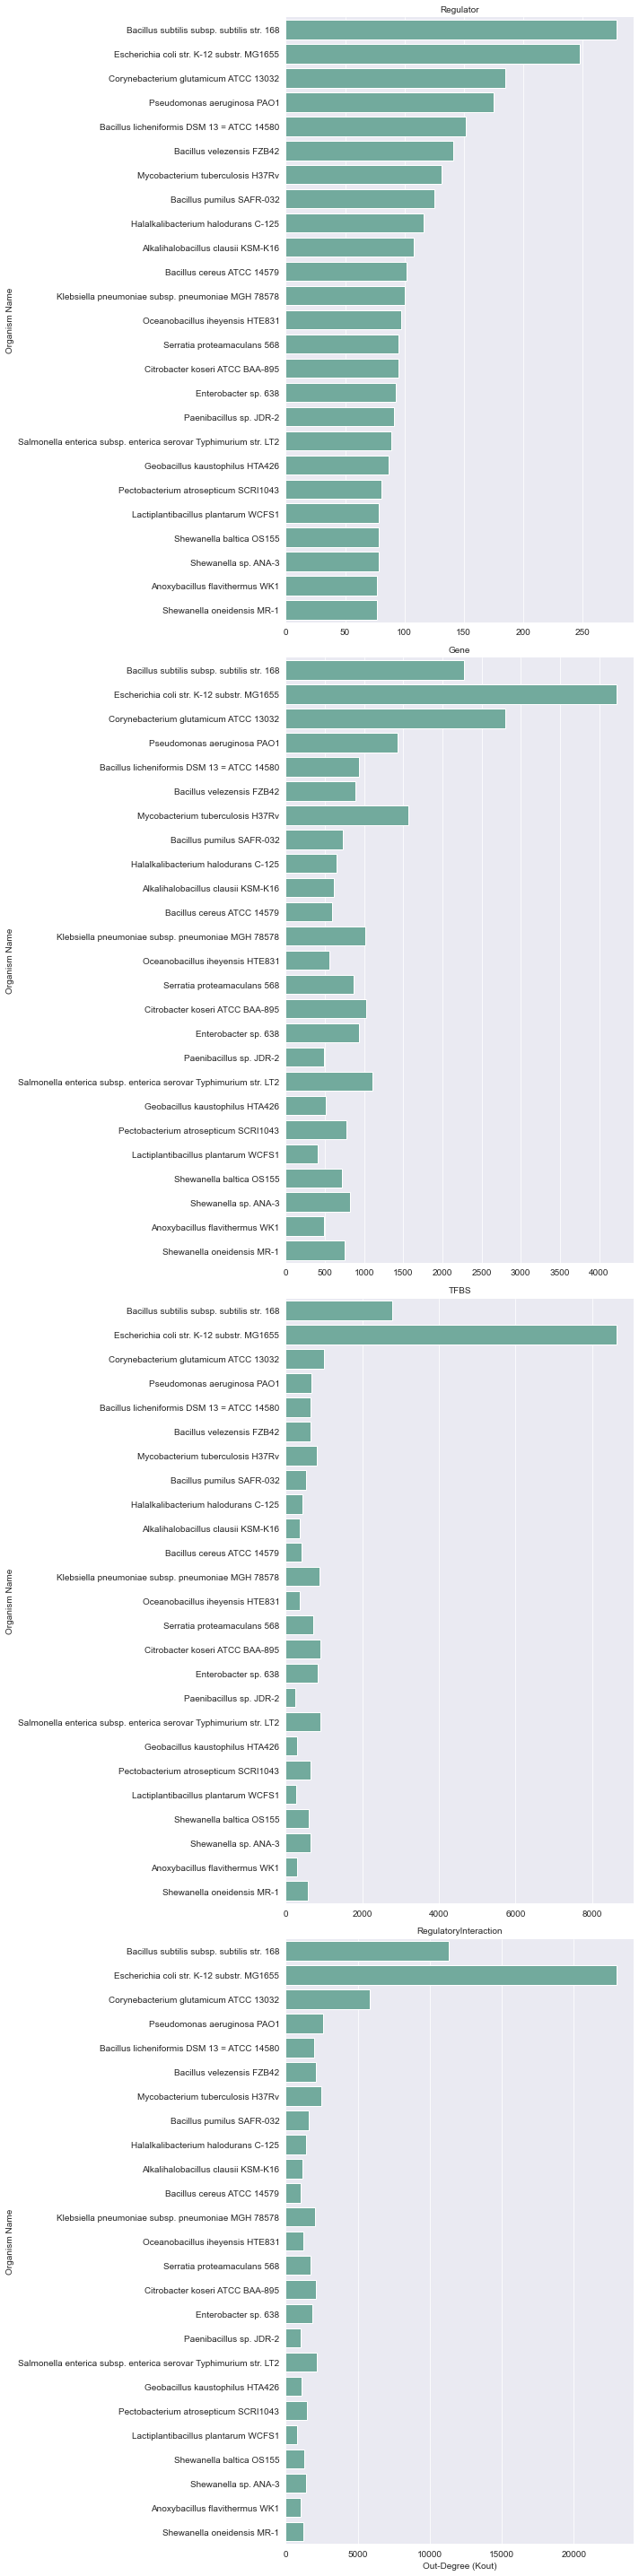

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(top_regulators_data,
                  row="label",
                  palette="Set3",
                  sharex=False,
                  sharey=False,
                  height=10)

g.map(sns.barplot,
      "Out-Degree (Kout)",
      "Organism Name",
      estimator=sum,
      ci=None,
      color='#69b3a2')

g.set_titles("{row_name}")

plt.savefig("organism_degree_top.png", bbox_inches="tight", dpi=150)
plt.show()

In [130]:
from protrend.model import Regulator

# regulator mechanism table
regulators = Regulator.node_to_df()
mechanisms = regulators['mechanism'].value_counts()
mechanisms

transcription factor        12013
small rna (srna)             3565
unknown                       373
sigma factor                   26
transcription terminator        1
Name: mechanism, dtype: int64